# Fouille données

In [12]:
!pip install pandas numpy matplotlib seaborn folium scikit-learn

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from collections import Counter

%matplotlib inline
sns.set(style="whitegrid")

In [14]:
# Chargement du fichier
# on_bad_lines='skip' permet de sauter les lignes mal formées sans planter
# On enlève engine='python' car le moteur par défaut (C) est souvent plus tolérant

df = pd.read_csv('flickr_data2.csv', on_bad_lines='skip')

print("Données brutes :")
display(df.head())

Données brutes :


C:\Users\jerom\AppData\Local\Temp\ipykernel_22776\831863605.py:5: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flickr_data2.csv', on_bad_lines='skip')


,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,4395181099,30624617@N03,45.754858,4.821710,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11.0,15,28,2,2010,23,20,28.0,2,2010.0,NaN,NaN,NaN
1,4394748717,35853470@N00,45.753270,4.862953,NaN,NaN,51.0,17,28,2,2010,52,17,28.0,2,2010.0,NaN,NaN,NaN
2,4394694699,11817998@N05,45.760655,4.846564,"365,iphone",59/365 - R46 V103 B163,29.0,17,28,2,2010,33,17,28.0,2,2010.0,NaN,NaN,NaN
3,4394803790,11545749@N06,45.784000,4.874072,"nin,nineinchnails,gift,screening,toiou,avott",2010-01-29 Toiou Avott Lyon,15.0,20,28,1,2010,38,12,28.0,2,2010.0,NaN,NaN,NaN
4,4394803554,11545749@N06,45.784000,4.874072,"lyon,nin,nineinchnails,gift,screening,toiou,avott",2010-01-28 Toiou Avott Lyon,10.0,20,28,1,2010,38,12,28.0,2,2010.0,NaN,NaN,NaN


In [15]:
print("Colonnes du DataFrame :")
print(df.columns.tolist())
print("\nInfo du DataFrame :")
df.info()

Colonnes du DataFrame :
['id', ' user', ' lat', ' long', ' tags', ' title', ' date_taken_minute', ' date_taken_hour', ' date_taken_day', ' date_taken_month', ' date_taken_year', ' date_upload_minute', ' date_upload_hour', ' date_upload_day', ' date_upload_month', ' date_upload_year', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18']

Info du DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420240 entries, 0 to 420239
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   420240 non-null  int64  
 1    user                420240 non-null  object 
 2    lat                 420240 non-null  float64
 3    long                420240 non-null  float64
 4    tags                316730 non-null  object 
 5    title               381911 non-null  object 
 6    date_taken_minute   420239 non-null  float64
 7    date_taken_hour     420240 non-null  int64  
 8    date_taken_day      42

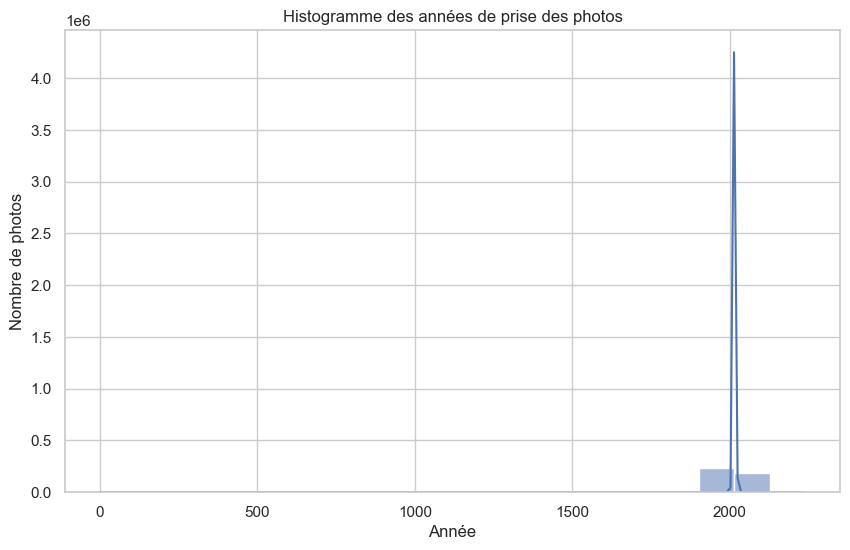

In [16]:
# Histogramme de la colonne année (date_taken_year)
plt.figure(figsize=(10, 6))
sns.histplot(df[' date_taken_year'], bins=20, kde=True)
plt.title('Histogramme des années de prise des photos')
plt.xlabel('Année')
plt.ylabel('Nombre de photos')
plt.show()

In [17]:
# Vérifier la plage des années
print("Année minimale :", df[' date_taken_year'].min())
print("Année maximale :", df[' date_taken_year'].max())
print("Années uniques :", sorted(df[' date_taken_year'].unique()))

Année minimale : 1
Année maximale : 2238
Années uniques : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 25, 1926, 1930, 1935, 1938, 1957, 1965, 1966, 1968, 1969, 1970, 1972, 1973, 1974, 1976, 1977, 1979, 1980, 1981, 1982, 1983, 1985, 1988, 1989, 1991, 1993, 1995, 1996, 1997, 1998, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2238]


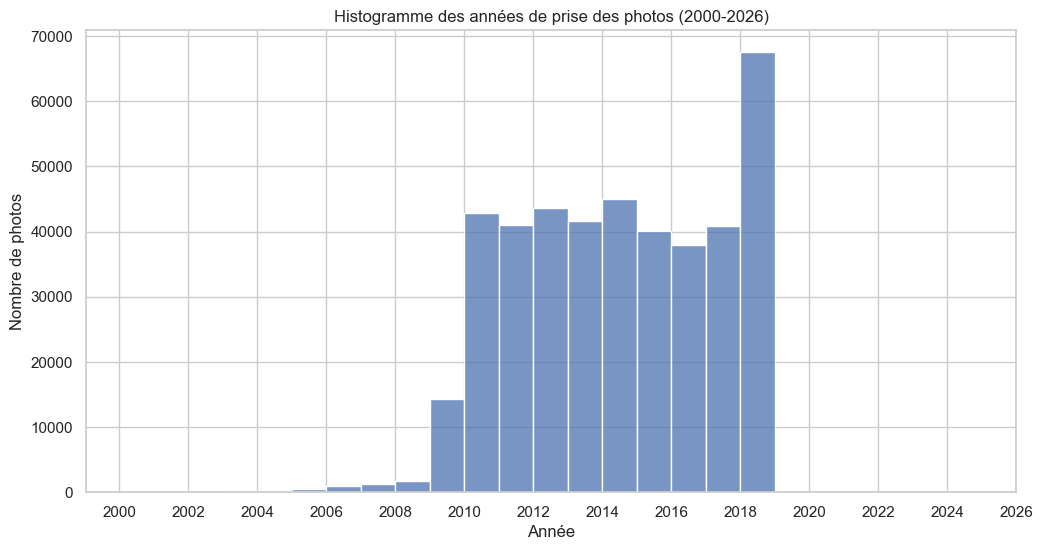

In [18]:
# Filtrer les données pour les années entre 2000 et 2026
df_filtered = df[(df[' date_taken_year'] >= 2000) & (df[' date_taken_year'] <= 2026)]

# Histogramme précis des années filtrées
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered[' date_taken_year'], bins=range(2000, 2027), binwidth=1)
plt.title('Histogramme des années de prise des photos (2000-2026)')
plt.xlabel('Année')
plt.ylabel('Nombre de photos')
plt.xticks(range(2000, 2027, 2))  # Étiquettes tous les 2 ans pour lisibilité
plt.show()

In [19]:
# Statistiques descriptives des colonnes numériques
print("Statistiques descriptives :")
display(df.describe())

# Nombre de valeurs manquantes par colonne
print("\nValeurs manquantes par colonne :")
display(df.isnull().sum())

Statistiques descriptives :


,id,lat,long,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18
count,4.202400e+05,420240.000000,420240.000000,420239.000000,420240.000000,420240.000000,420240.000000,420240.000000,420238.000000,420240.000000,420239.000000,142.000000,0.0,2.0
mean,2.002697e+10,45.768173,4.839672,30.068559,14.746695,15.456813,7.000493,2013.294256,16.398738,6.698277,2013.648624,1958.880282,NaN,2012.0
std,1.411384e+10,0.028575,0.031619,39.880117,6.583236,9.637870,4.611831,37.141359,8.450967,4.672163,37.006109,331.444924,NaN,0.0
min,3.066675e+08,45.655200,4.720312,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,12.000000,NaN,2012.0
25%,7.094503e+09,45.757613,4.826202,14.000000,12.000000,8.000000,4.000000,2012.000000,9.000000,4.000000,2012.000000,2013.000000,NaN,2012.0
50%,1.548087e+10,45.763152,4.832183,30.000000,15.000000,15.000000,7.000000,2014.000000,17.000000,7.000000,2014.000000,2016.000000,NaN,2012.0
75%,3.145886e+10,45.773509,4.846558,45.000000,18.000000,23.000000,10.000000,2017.000000,24.000000,10.000000,2017.000000,2016.000000,NaN,2012.0
max,4.914809e+10,45.854950,5.006709,2019.000000,2013.000000,2013.000000,2011.000000,2238.000000,31.000000,2011.000000,2019.000000,2019.000000,NaN,2012.0



Valeurs manquantes par colonne :


id                          0
 user                       0
 lat                        0
 long                       0
 tags                  103510
 title                  38329
 date_taken_minute          1
 date_taken_hour            0
 date_taken_day             0
 date_taken_month           0
 date_taken_year            0
 date_upload_minute        12
 date_upload_hour           2
 date_upload_day            2
 date_upload_month          0
 date_upload_year           1
Unnamed: 16            420098
Unnamed: 17            420240
Unnamed: 18            420238
dtype: int64

In [20]:
# Analyse des données inspirée du notebook exploration-clustering-handson.ipynb

# 1. Vérification des valeurs manquantes
print("=== Valeurs manquantes ===")
print("Info du DataFrame :")
df.info()
print("\nNombre de valeurs manquantes par colonne :")
print(df.isnull().sum())
print("\nPourcentage de valeurs manquantes :")
print((df.isnull().sum() / len(df)) * 100)

# 2. Vérification des doublons
print("\n=== Doublons ===")
print(f"Nombre de doublons : {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    print("Exemples de doublons :")
    display(df[df.duplicated(keep=False)].head())

# 3. Cohérence des données
print("\n=== Cohérence des données ===")

# Années
print("Années incohérentes (négatives ou > 2026) :")
invalid_years = df[(df[' date_taken_year'] < 0) | (df[' date_taken_year'] > 2026)]
print(f"Nombre : {len(invalid_years)}")
if len(invalid_years) > 0:
    print("Exemples :")
    display(invalid_years[[' date_taken_year']].head())

# Latitude
print("\nLatitudes incohérentes (hors [-90, 90]) :")
invalid_lat = df[(df[' lat'] < -90) | (df[' lat'] > 90)]
print(f"Nombre : {len(invalid_lat)}")

# Longitude
print("\nLongitudes incohérentes (hors [-180, 180]) :")
invalid_long = df[(df[' long'] < -180) | (df[' long'] > 180)]
print(f"Nombre : {len(invalid_long)}")

# Minutes et heures
print("\nMinutes incohérentes (hors [0, 59]) :")
invalid_min = df[(df[' date_taken_minute'] < 0) | (df[' date_taken_minute'] > 59)]
print(f"Nombre : {len(invalid_min)}")

print("\nHeures incohérentes (hors [0, 23]) :")
invalid_hour = df[(df[' date_taken_hour'] < 0) | (df[' date_taken_hour'] > 23)]
print(f"Nombre : {len(invalid_hour)}")

# Jours
print("\nJours incohérents (hors [1, 31]) :")
invalid_day = df[(df[' date_taken_day'] < 1) | (df[' date_taken_day'] > 31)]
print(f"Nombre : {len(invalid_day)}")

# Mois
print("\nMois incohérents (hors [1, 12]) :")
invalid_month = df[(df[' date_taken_month'] < 1) | (df[' date_taken_month'] > 12)]
print(f"Nombre : {len(invalid_month)}")

=== Valeurs manquantes ===
Info du DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420240 entries, 0 to 420239
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   420240 non-null  int64  
 1    user                420240 non-null  object 
 2    lat                 420240 non-null  float64
 3    long                420240 non-null  float64
 4    tags                316730 non-null  object 
 5    title               381911 non-null  object 
 6    date_taken_minute   420239 non-null  float64
 7    date_taken_hour     420240 non-null  int64  
 8    date_taken_day      420240 non-null  int64  
 9    date_taken_month    420240 non-null  int64  
 10   date_taken_year     420240 non-null  int64  
 11   date_upload_minute  420228 non-null  object 
 12   date_upload_hour    420238 non-null  object 
 13   date_upload_day     420238 non-null  float64
 14   date_upload_month   

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,4395181099,30624617@N03,45.754858,4.821710,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11.0,15,28,2,2010,23,20,28.0,2,2010.0,NaN,NaN,NaN
1,4394748717,35853470@N00,45.753270,4.862953,NaN,NaN,51.0,17,28,2,2010,52,17,28.0,2,2010.0,NaN,NaN,NaN
2,4394694699,11817998@N05,45.760655,4.846564,"365,iphone",59/365 - R46 V103 B163,29.0,17,28,2,2010,33,17,28.0,2,2010.0,NaN,NaN,NaN
3,4394803790,11545749@N06,45.784000,4.874072,"nin,nineinchnails,gift,screening,toiou,avott",2010-01-29 Toiou Avott Lyon,15.0,20,28,1,2010,38,12,28.0,2,2010.0,NaN,NaN,NaN
4,4394803554,11545749@N06,45.784000,4.874072,"lyon,nin,nineinchnails,gift,screening,toiou,avott",2010-01-28 Toiou Avott Lyon,10.0,20,28,1,2010,38,12,28.0,2,2010.0,NaN,NaN,NaN



=== Cohérence des données ===
Années incohérentes (négatives ou > 2026) :
Nombre : 2
Exemples :


,date_taken_year
106207,2238
110822,2238



Latitudes incohérentes (hors [-90, 90]) :
Nombre : 0

Longitudes incohérentes (hors [-180, 180]) :
Nombre : 0

Minutes incohérentes (hors [0, 59]) :
Nombre : 137

Heures incohérentes (hors [0, 23]) :
Nombre : 92

Jours incohérents (hors [1, 31]) :
Nombre : 2

Mois incohérents (hors [1, 12]) :
Nombre : 84


In [21]:
# Nettoyage des données basé sur l'analyse

print("=== Nettoyage des données ===")
print(f"Nombre de lignes avant nettoyage : {len(df)}")

# 1. Supprimer les doublons
df_clean = df.drop_duplicates()
print(f"Après suppression des doublons : {len(df_clean)}")

# 2. Filtrer les années cohérentes (entre 1900 et 2026, par exemple)
df_clean = df_clean[(df_clean[' date_taken_year'] >= 1900) & (df_clean[' date_taken_year'] <= 2026)]
print(f"Après filtrage des années : {len(df_clean)}")

# 3. Filtrer les minutes cohérentes
df_clean = df_clean[(df_clean[' date_taken_minute'] >= 0) & (df_clean[' date_taken_minute'] <= 59)]
print(f"Après filtrage des minutes : {len(df_clean)}")

# 4. Filtrer les heures cohérentes
df_clean = df_clean[(df_clean[' date_taken_hour'] >= 0) & (df_clean[' date_taken_hour'] <= 23)]
print(f"Après filtrage des heures : {len(df_clean)}")

# 5. Filtrer les jours cohérents
df_clean = df_clean[(df_clean[' date_taken_day'] >= 1) & (df_clean[' date_taken_day'] <= 31)]
print(f"Après filtrage des jours : {len(df_clean)}")

# 6. Filtrer les mois cohérents
df_clean = df_clean[(df_clean[' date_taken_month'] >= 1) & (df_clean[' date_taken_month'] <= 12)]
print(f"Après filtrage des mois : {len(df_clean)}")

# 7. Optionnel : Supprimer les colonnes presque vides (Unnamed)
df_clean = df_clean.drop(columns=[col for col in df_clean.columns if col.startswith('Unnamed')])
print(f"Après suppression des colonnes vides : {len(df_clean.columns)} colonnes")

print(f"\nNombre final de lignes : {len(df_clean)}")
print("Colonnes finales :", df_clean.columns.tolist())

# Afficher un aperçu des données nettoyées
print("\nAperçu des données nettoyées :")
display(df_clean.head())

# Sauvegarder les données nettoyées (optionnel)
# df_clean.to_csv('flickr_data_cleaned.csv', index=False)

=== Nettoyage des données ===
Nombre de lignes avant nettoyage : 420240
Après suppression des doublons : 187598
Après filtrage des années : 187543
Après filtrage des minutes : 187543
Après filtrage des heures : 187543
Après filtrage des jours : 187543
Après filtrage des mois : 187543
Après suppression des colonnes vides : 16 colonnes

Nombre final de lignes : 187543
Colonnes finales : ['id', ' user', ' lat', ' long', ' tags', ' title', ' date_taken_minute', ' date_taken_hour', ' date_taken_day', ' date_taken_month', ' date_taken_year', ' date_upload_minute', ' date_upload_hour', ' date_upload_day', ' date_upload_month', ' date_upload_year']

Aperçu des données nettoyées :


,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year
0,4395181099,30624617@N03,45.754858,4.821710,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11.0,15,28,2,2010,23,20,28.0,2,2010.0
1,4394748717,35853470@N00,45.753270,4.862953,NaN,NaN,51.0,17,28,2,2010,52,17,28.0,2,2010.0
2,4394694699,11817998@N05,45.760655,4.846564,"365,iphone",59/365 - R46 V103 B163,29.0,17,28,2,2010,33,17,28.0,2,2010.0
3,4394803790,11545749@N06,45.784000,4.874072,"nin,nineinchnails,gift,screening,toiou,avott",2010-01-29 Toiou Avott Lyon,15.0,20,28,1,2010,38,12,28.0,2,2010.0
4,4394803554,11545749@N06,45.784000,4.874072,"lyon,nin,nineinchnails,gift,screening,toiou,avott",2010-01-28 Toiou Avott Lyon,10.0,20,28,1,2010,38,12,28.0,2,2010.0


In [22]:
# Analyse des colonnes non pertinentes

print("=== Analyse des colonnes non pertinentes ===")

# Colonnes actuelles
print("Colonnes dans df_clean :")
print(df_clean.columns.tolist())

# 1. Colonnes avec trop de valeurs manquantes
missing_pct = (df_clean.isnull().sum() / len(df_clean)) * 100
print("\nPourcentage de valeurs manquantes par colonne :")
print(missing_pct)

high_missing = missing_pct[missing_pct > 50]  # Plus de 50% manquants
print(f"\nColonnes avec >50% de manquants : {high_missing.index.tolist()}")

# 2. Colonnes avec faible variance (peu d'information)
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
print(f"\nColonnes numériques : {numeric_cols.tolist()}")

low_variance = []
for col in numeric_cols:
    if df_clean[col].var() < 0.01:  # Variance très faible
        low_variance.append(col)
print(f"Colonnes numériques avec variance < 0.01 : {low_variance}")

# 3. Colonnes potentiellement non pertinentes pour l'analyse
# - 'id' : Identifiant unique, pas utile pour modélisation
# - ' user' : Nom d'utilisateur, peut être utile pour analyse par utilisateur, mais texte
# - ' tags' : Texte, beaucoup de manquants, difficile à traiter sans NLP
# - ' title' : Texte, manquants, similaire
# - Colonnes de date upload : Si on se concentre sur les dates de prise, upload moins pertinent

potentially_irrelevant = ['id', ' user', ' tags', ' title', ' date_upload_minute', ' date_upload_hour', ' date_upload_day', ' date_upload_month', ' date_upload_year']

print(f"\nColonnes potentiellement non pertinentes : {potentially_irrelevant}")

# Colonnes pertinentes restantes
relevant_cols = [col for col in df_clean.columns if col not in potentially_irrelevant]
print(f"\nColonnes pertinentes suggérées : {relevant_cols}")

# Exemple : DataFrame avec seulement les colonnes pertinentes
df_relevant = df_clean[relevant_cols]
print(f"\nAperçu du DataFrame avec colonnes pertinentes :")
display(df_relevant.head())

=== Analyse des colonnes non pertinentes ===
Colonnes dans df_clean :
['id', ' user', ' lat', ' long', ' tags', ' title', ' date_taken_minute', ' date_taken_hour', ' date_taken_day', ' date_taken_month', ' date_taken_year', ' date_upload_minute', ' date_upload_hour', ' date_upload_day', ' date_upload_month', ' date_upload_year']

Pourcentage de valeurs manquantes par colonne :
id                      0.000000
 user                   0.000000
 lat                    0.000000
 long                   0.000000
 tags                  25.035858
 title                  9.043793
 date_taken_minute      0.000000
 date_taken_hour        0.000000
 date_taken_day         0.000000
 date_taken_month       0.000000
 date_taken_year        0.000000
 date_upload_minute     0.000000
 date_upload_hour       0.000000
 date_upload_day        0.000000
 date_upload_month      0.000000
 date_upload_year       0.000000
dtype: float64

Colonnes avec >50% de manquants : []

Colonnes numériques : ['id', ' lat', '

,lat,long,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year
0,45.754858,4.821710,11.0,15,28,2,2010
1,45.753270,4.862953,51.0,17,28,2,2010
2,45.760655,4.846564,29.0,17,28,2,2010
3,45.784000,4.874072,15.0,20,28,1,2010
4,45.784000,4.874072,10.0,20,28,1,2010


In [23]:
# Réévaluation de la pertinence des colonnes basée sur la description du projet

print("=== Réévaluation des colonnes basée sur les objectifs du projet ===")

# Rappel des objectifs :
# 1. Découvrir des zones d'intérêt (AOI) : Clustering sur les localisations (lat, long)
# 2. Caractériser ces zones : NLP sur titres et tags
# 3. Analyser la dynamique temporelle : Analyse des dates de prise

# Colonnes pertinentes pour chaque objectif :
pertinent_clustering = [' lat', ' long']  # Pour regrouper les photos par localisation
pertinent_nlp = [' tags', ' title']  # Pour caractériser les zones via NLP
pertinent_temporel = [' date_taken_year', ' date_taken_month', ' date_taken_day', ' date_taken_hour', ' date_taken_minute']  # Pour analyser la temporalité
pertinent_comportement = [' user']  # Potentiellement pour analyser le comportement des touristes

# Colonnes non pertinentes :
non_pertinent = ['id', ' date_upload_minute', ' date_upload_hour', ' date_upload_day', ' date_upload_month', ' date_upload_year']

print("Colonnes pour clustering (AOI) :", pertinent_clustering)
print("Colonnes pour NLP (caractérisation) :", pertinent_nlp)
print("Colonnes pour analyse temporelle :", pertinent_temporel)
print("Colonnes pour analyse comportementale :", pertinent_comportement)
print("Colonnes non pertinentes :", non_pertinent)

# Toutes les colonnes pertinentes
toutes_pertinentes = pertinent_clustering + pertinent_nlp + pertinent_temporel + pertinent_comportement
print(f"\nToutes les colonnes pertinentes : {toutes_pertinentes}")

# Vérifier si elles existent dans df_clean
colonnes_existantes = [col for col in toutes_pertinentes if col in df_clean.columns]
print(f"Colonnes pertinentes présentes : {colonnes_existantes}")

# DataFrame final avec colonnes pertinentes
df_final = df_clean[colonnes_existantes]
print(f"\nDataFrame final avec {len(df_final)} lignes et {len(colonnes_existantes)} colonnes.")
print("Aperçu :")
display(df_final.head())

# Statistiques sur les colonnes pertinentes
print("\nStatistiques des colonnes pertinentes :")
display(df_final.describe(include='all'))

=== Réévaluation des colonnes basée sur les objectifs du projet ===
Colonnes pour clustering (AOI) : [' lat', ' long']
Colonnes pour NLP (caractérisation) : [' tags', ' title']
Colonnes pour analyse temporelle : [' date_taken_year', ' date_taken_month', ' date_taken_day', ' date_taken_hour', ' date_taken_minute']
Colonnes pour analyse comportementale : [' user']
Colonnes non pertinentes : ['id', ' date_upload_minute', ' date_upload_hour', ' date_upload_day', ' date_upload_month', ' date_upload_year']

Toutes les colonnes pertinentes : [' lat', ' long', ' tags', ' title', ' date_taken_year', ' date_taken_month', ' date_taken_day', ' date_taken_hour', ' date_taken_minute', ' user']
Colonnes pertinentes présentes : [' lat', ' long', ' tags', ' title', ' date_taken_year', ' date_taken_month', ' date_taken_day', ' date_taken_hour', ' date_taken_minute', ' user']

DataFrame final avec 187543 lignes et 10 colonnes.
Aperçu :


,lat,long,tags,title,date_taken_year,date_taken_month,date_taken_day,date_taken_hour,date_taken_minute,user
0,45.754858,4.821710,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,2010,2,28,15,11.0,30624617@N03
1,45.753270,4.862953,NaN,NaN,2010,2,28,17,51.0,35853470@N00
2,45.760655,4.846564,"365,iphone",59/365 - R46 V103 B163,2010,2,28,17,29.0,11817998@N05
3,45.784000,4.874072,"nin,nineinchnails,gift,screening,toiou,avott",2010-01-29 Toiou Avott Lyon,2010,1,28,20,15.0,11545749@N06
4,45.784000,4.874072,"lyon,nin,nineinchnails,gift,screening,toiou,avott",2010-01-28 Toiou Avott Lyon,2010,1,28,20,10.0,11545749@N06



Statistiques des colonnes pertinentes :


,lat,long,tags,title,date_taken_year,date_taken_month,date_taken_day,date_taken_hour,date_taken_minute,user
count,187543.000000,187543.000000,140590,170582,187543.000000,187543.000000,187543.000000,187543.000000,187543.000000,187543
unique,NaN,NaN,41718,97329,NaN,NaN,NaN,NaN,NaN,5157
top,NaN,NaN,"france,lyon",Lyon,NaN,NaN,NaN,NaN,NaN,40936370@N00
freq,NaN,NaN,1842,2513,NaN,NaN,NaN,NaN,NaN,15392
mean,45.768187,4.839834,NaN,NaN,2013.936665,7.133692,15.022837,14.755075,29.411154,NaN
std,0.028456,0.032186,NaN,NaN,3.099376,3.453715,8.665019,4.954714,17.468887,NaN
min,45.655200,4.720312,NaN,NaN,1926.000000,1.000000,1.000000,0.000000,0.000000,NaN
25%,45.757613,4.826248,NaN,NaN,2012.000000,4.000000,8.000000,12.000000,14.000000,NaN
50%,45.763269,4.832222,NaN,NaN,2014.000000,7.000000,14.000000,15.000000,30.000000,NaN
75%,45.773642,4.846794,NaN,NaN,2017.000000,10.000000,22.000000,18.000000,45.000000,NaN
